In [3]:
#Package importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.tree import export_graphviz
from warnings import simplefilter

In [4]:
#Importing CSV
oj = pd.read_csv("C:/Users/tony/Desktop/Machine Learning/OJ.csv")

In [5]:
#Checking for missing values
oj.isna().sum()

Unnamed: 0        0
Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

In [6]:
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [7]:
#CH = 1, Yes = 1 else 0
oj['Purchase'] = (oj['Purchase'] == "CH").astype(int)
oj['Store7'] = (oj['Store7'] == "Yes").astype(int)

In [8]:
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,2,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,3,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,4,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,5,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


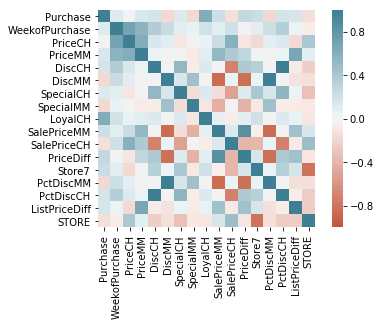

In [9]:
#LoyalCH is most correlated with Purchase, so it should be included
corr = oj.corr()
corr.drop(corr.iloc[:, [0,3]], inplace = True, axis = 0)
corr.drop(corr.iloc[:, [0,3]], inplace = True, axis = 1)

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCC3BE9D68>,
      dtype=object)

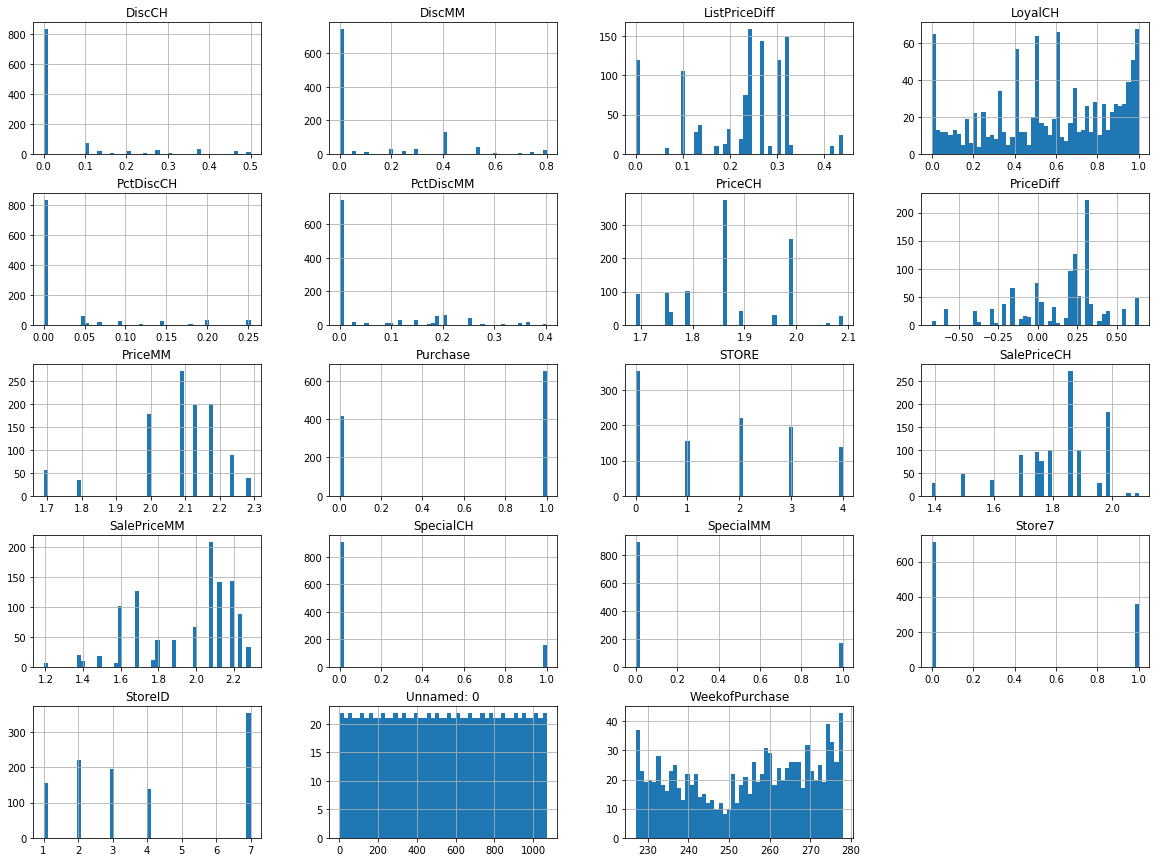

In [10]:
#Quick graph to see the distribution.
oj.hist(bins= 50, figsize = (20,15))

In [11]:
#Dropping this as it's a redundant field
oj.drop(oj.iloc[:, [0, 3]], axis = 1, inplace= True)

In [12]:
#Scaling Data to prevent features with larger scale from biasing the prediction.
oj_columns = oj.iloc[:, [1,2,3,4,5,8,9,10,11,13,14,15]]
standard = StandardScaler()
oj_scaled = standard.fit_transform(oj_columns)
oj_scaled = pd.DataFrame(oj_scaled, columns = oj_columns.columns)
oj.drop(oj.iloc[:, [1,2,3,4,5,8,9,10,11,13,14,15]], inplace = True, axis = 1)

In [13]:
oj = pd.concat([oj, oj_scaled], axis = 1, sort = False, ignore_index= False)

In [14]:
oj.head()

,Purchase,SpecialCH,SpecialMM,Store7,STORE,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff
0,1,0,0,0,1,-1.117696,-1.152062,-0.710313,-0.441664,-0.577188,-0.213788,0.110671,-0.457454,0.344516,-0.583001,-0.439106,0.204766
1,1,0,1,0,1,-0.989087,-1.152062,-0.710313,-0.441664,0.826428,0.111205,-1.077075,-0.457454,-0.760718,0.899158,-0.439106,0.204766
2,1,0,0,0,1,-0.603260,-0.072806,0.034162,1.006140,-0.577188,0.371200,0.506587,-0.876108,0.933974,-0.583001,1.030237,0.111730
3,0,0,0,0,1,-1.760741,-1.740747,-2.943741,-0.441664,-0.577188,-0.538781,-1.077075,-0.876108,-0.539671,-0.583001,-0.439106,-2.028100
4,1,0,0,1,0,-1.696437,-1.740747,-2.943741,-0.441664,-0.577188,1.269920,-1.077075,-0.876108,-0.539671,-0.583001,-0.439106,-2.028100


In [15]:
#Splitting data
X_train, x_test, Y_train, y_test = train_test_split(oj.iloc[:, 1:], oj["Purchase"], test_size = 0.3, random_state = 0)

In [16]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#Logistic Regression
logistic = LogisticRegression(random_state = 0)
param_grid_logistic = {"penalty": ['l1', 'l2']
              }
grid_search_logistic = GridSearchCV(estimator = logistic, param_grid = param_grid_logistic, cv = 5)
grid_search_logistic.fit(X_train, Y_train)
grid_search_logistic.best_params_

{'penalty': 'l2'}

In [17]:
logistic = LogisticRegression(random_state = 0, penalty = 'l2')

logistic_prediction = cross_val_predict(logistic, X_train, Y_train, cv = 5)
confusion_logistic = confusion_matrix(Y_train, logistic_prediction)
print(classification_report(Y_train, logistic_prediction))

print(logistic)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       281
           1       0.85      0.88      0.87       468

    accuracy                           0.83       749
   macro avg       0.82      0.81      0.82       749
weighted avg       0.83      0.83      0.83       749

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:
logistic.fit(X_train, Y_train)
logistic_prediction_test = logistic.predict(x_test)
confusion_logistic_test = confusion_matrix(y_test, logistic_prediction_test)
print(classification_report(y_test, logistic_prediction_test))
print(confusion_logistic_test)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       136
           1       0.84      0.87      0.86       185

    accuracy                           0.83       321
   macro avg       0.83      0.82      0.83       321
weighted avg       0.83      0.83      0.83       321

[[106  30]
 [ 24 161]]


In [19]:
#Random Forest
randomforest = RandomForestClassifier(random_state = 0)
param_grid = {"max_depth": [3,4,5, None],
              "min_samples_leaf": [1,2,3,4],
              "bootstrap": [True,False],
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_split": [2,3,4,5]
              }

grid_search = GridSearchCV(estimator = randomforest, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_



{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [20]:
randomforest = RandomForestClassifier(bootstrap = True, max_depth = 4, max_features = "auto", min_samples_leaf = 2, min_samples_split = 2)
randomforest_prediction = cross_val_predict(randomforest, X_train, Y_train, cv = 5)
confusion_forest = confusion_matrix(Y_train, randomforest_prediction)
print(classification_report(Y_train, randomforest_prediction))

print(randomforest)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       281
           1       0.83      0.88      0.86       468

    accuracy                           0.81       749
   macro avg       0.81      0.79      0.80       749
weighted avg       0.81      0.81      0.81       749

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [21]:
randomforest.fit(X_train, Y_train)
randomforest_prediction_test = randomforest.predict(x_test)
confusion_forest_test = confusion_matrix(y_test, randomforest_prediction_test)
print(classification_report(y_test, randomforest_prediction_test))
print(confusion_forest_test)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       136
           1       0.81      0.83      0.82       185

    accuracy                           0.79       321
   macro avg       0.79      0.79      0.79       321
weighted avg       0.79      0.79      0.79       321

[[101  35]
 [ 31 154]]


In [22]:
#X_matrix = xgb.DMatrix(X_train, Y_train)
#XGBoost Classifier
boost = xgb.XGBClassifier(objective = 'reg:logistic', random_state = 0)

param_grid_boost = {"max_depth": [3,5,7,9],
               "learning_rate": [0.1,0.2,0.3]
               }

grid_search_boost = GridSearchCV(boost, param_grid= param_grid_boost, cv = 5)
grid_search_boost.fit(X_train, Y_train)
grid_search_boost.best_params_


{'learning_rate': 0.1, 'max_depth': 3}

In [23]:
boost = xgb.XGBClassifier(objective = 'reg:logistic', random_state = 0, learning_rate = 0.1, max_depth = 3)
boost_prediction = cross_val_predict(boost, X_train, Y_train, cv = 5)
confusion_boost = confusion_matrix(Y_train, boost_prediction)
print(classification_report(Y_train, boost_prediction))
print(boost)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       281
           1       0.85      0.86      0.86       468

    accuracy                           0.82       749
   macro avg       0.81      0.80      0.81       749
weighted avg       0.82      0.82      0.82       749

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [24]:
boost.fit(X_train, Y_train)
boost_prediction_test = boost.predict(x_test)
confusion_boost_test = confusion_matrix(y_test, boost_prediction_test)
print(classification_report(y_test, boost_prediction_test))
print(confusion_boost_test)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       136
           1       0.82      0.84      0.83       185

    accuracy                           0.80       321
   macro avg       0.80      0.80      0.80       321
weighted avg       0.80      0.80      0.80       321

[[102  34]
 [ 29 156]]


In [25]:
#Decision Tree
dt =  DecisionTreeClassifier(random_state = 0)
param_grid_dt = {"max_depth": [3,4,5, None],
              "min_samples_leaf": [1,2,3,4],
              "max_leaf_nodes": [2,3,None],
              "min_samples_split": [2,3,4,5]
                }

grid_search_dt = GridSearchCV(dt, param_grid= param_grid_dt, cv = 5)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [26]:
dt =  DecisionTreeClassifier(random_state = 0, max_depth = 5, max_leaf_nodes = None, min_samples_leaf = 3, min_samples_split = 2)
dt_prediction = cross_val_predict(dt, X_train, Y_train, cv = 5)
confusion_dt = confusion_matrix(Y_train, boost_prediction)
print(classification_report(Y_train, dt_prediction))
print(dt)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       281
           1       0.86      0.82      0.84       468

    accuracy                           0.80       749
   macro avg       0.79      0.80      0.79       749
weighted avg       0.81      0.80      0.81       749

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


In [27]:
dt.fit(X_train, Y_train)
dt_prediction_test = dt.predict(x_test)
confusion_dt_test = confusion_matrix(y_test, dt_prediction_test)
print(classification_report(y_test, dt_prediction_test))
print(confusion_dt_test)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       136
           1       0.85      0.78      0.81       185

    accuracy                           0.79       321
   macro avg       0.79      0.79      0.79       321
weighted avg       0.80      0.79      0.79       321

[[110  26]
 [ 41 144]]


In [28]:
#Naive Bayes
nb = GaussianNB()
nb_prediction = cross_val_predict(nb, X_train, Y_train, cv = 5)
confusion_dt = confusion_matrix(Y_train, boost_prediction)
print(classification_report(Y_train, nb_prediction))
print(nb)


              precision    recall  f1-score   support

           0       0.65      0.75      0.70       281
           1       0.83      0.76      0.79       468

    accuracy                           0.75       749
   macro avg       0.74      0.75      0.74       749
weighted avg       0.76      0.75      0.76       749

GaussianNB(priors=None, var_smoothing=1e-09)


In [29]:
nb.fit(X_train, Y_train)
nb_prediction_test = nb.predict(x_test)
confusion_nb_test = confusion_matrix(y_test, nb_prediction_test)
print(classification_report(y_test, nb_prediction_test))
print(confusion_nb_test)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       136
           1       0.84      0.75      0.79       185

    accuracy                           0.77       321
   macro avg       0.77      0.77      0.77       321
weighted avg       0.78      0.77      0.77       321

[[109  27]
 [ 47 138]]
